# PMIP4 Mid-Holocene


# 0. Introduction
This is a notebook that contains and makes some plots for a PMIP collaborative effort to get a multi-model paper describing some broad features of the mid-Holocene simulations. 

## General steps before making plots
This part includes:
1. Download input files
2. Import packages
3. Define some functions for loading data. Don't make any changes to this part.


### Download data
This step will download the input data files package called PMIP4_midHolocence_cvdp_data.tar.gz, and then unpack the folders and files into data dictory.



In [1]:
#press Enter + Shift to run coding cells
#No change needs here

! scripts/download_cvdp_data.sh

/usr/bin/sh: scripts/download_cvdp_data.sh: No such file or directory


#### You will get the following files/folders in your data dictory:
1. abrupt4xCO2 
2. historical 
3. midHolocene
4. midHolocene-cal-adj
5. piControl
6. C20-Reanalysis.cvdp_data.1871-2012.nc
7. GPCP.cvdp_data.1979-1999.nc

### Import packages

In [1]:
#No change needs here


'''Import packages for loading data, analysing, and plotting'''

#import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#import iris
#from iris import load, Constraint
#import iris.quickplot as qplt
#import xesmf as xe
%matplotlib inline
#import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from mpl_toolkits import basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma
import math
import xlrd
import os
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

### Define some functions for loading and analysing data. 
Don't make any changes to this part.

In [2]:
#No change needs here

'''Define functions'''

#This function will get all available experiment names
def experimentlist():
    exps=[]
    file_path = "data" 
    for dirpaths, dirnames, filenames in os.walk(file_path):
        for d in dirnames:
            exps.append(d)
    return exps

#This function will get all available model names in the experiment 
def modellist(experiment):
    models=[]
    file_path = "data/%s" %(experiment)
    for dirpaths, dirnames, filenames in os.walk(file_path):
        for f in filenames:
            mname=f.split("_")[0]
            models.append(mname)
    return models

#This function will get all available filenames in the experiment 
def filenamelist(experiment):
    filenames=[]
    file_path = "data/%s" %(experiment)
    for dirpaths, dirnames, files in os.walk(file_path):
        for f in files:
            ff='data/%s/%s'%(experiment,f)
            filenames.append(ff)
    return filenames

    
#This function will regrid data to same resolution
def regrid(data,latin,lonin,lat_grid,lon_grid):
    lonout=np.linspace(0,360,lon_grid)
    latout=np.linspace(-90,90,lat_grid)
    lonout,latout = np.meshgrid(lonout,latout)
    data_new=basemap.interp(data,lonin, latin, lonout, latout, order=1)
    return data_new

def regrided_dataset():
    dataset=[]
    for f in filenames:
        d=Dataset(f)
        var=d.variables[variable][:]
        latin=d.variables['lat'][:]
        lonin=d.variables['lon'][:]
        regrided_var=regrid(var,latin,lonin,lat_grid,lon_grid)
        dataset.append(regrided_var)
    regrided_data=np.array(dataset)
    return regrided_data


## Available experiments and models

In [3]:
#No change needs here

'''Available experiments'''

#list all available experiments
available_exps=experimentlist()
available_exps

['midHolocene-cal-adj',
 'midHolocene',
 'piControl',
 'historical',
 'abrupt4xCO2']

In [4]:
#No change needs here

'''Available models'''

#list all available models

available_models=modellist('midHolocene')
available_models

['IPSL-CM5A-LR',
 'GISS-E2-R',
 'IPSL-CM6A-LR',
 'bcc-csm1-1',
 'CSIRO-Mk3-6-0',
 'HadGEM2-CC',
 'CNRM-CM5',
 'CSIRO-Mk3L-1-2',
 'FGOALS-g2',
 'CCSM4',
 'HadGEM3-GC31',
 'HadGEM2-ES',
 'AWI-ESM',
 'FGOALS-s2',
 'EC-EARTH-2-2',
 'MPI-ESM-P',
 'MRI-CGCM3',
 'MIROC-ESM']

# 1. Choosing experiment and variable

This part will allow you to choose the experiment and the variable you want to analyse. 

In [5]:
#Enter the experiment name

'''Choose experiments you would like to look at'''

experiment='midHolocene'

# midHolocene-cal-adj
# midHolocene
# piControl
# historical
# abrupt4xCO2


#Get all filenames
filenames=filenamelist(experiment)

In [6]:
#No change needs here

'''Available variables'''
data_example=Dataset(filenames[0])
data_example.variables.keys()

odict_keys(['lat', 'lon', 'pr_spatialmean_ann', 'pr_spatialmean_djf', 'pr_spatialmean_jja', 'pr_spatialmean_mam', 'pr_spatialmean_son', 'pr_spatialstddev_ann', 'pr_spatialstddev_djf', 'pr_spatialstddev_jja', 'pr_spatialstddev_mam', 'pr_spatialstddev_son', 'tas_spatialmean_ann', 'tas_spatialmean_djf', 'tas_spatialmean_jja', 'tas_spatialmean_mam', 'tas_spatialmean_son', 'tas_spatialstddev_ann', 'tas_spatialstddev_djf', 'tas_spatialstddev_jja', 'tas_spatialstddev_mam', 'tas_spatialstddev_son', 'TIME', 'monsoon_area_AUSMC', 'monsoon_area_EAS', 'monsoon_area_NAF', 'monsoon_area_NAMS', 'monsoon_area_SAF', 'monsoon_area_SAMS', 'monsoon_area_SAS', 'monsoon_area_global', 'monsoon_domain', 'monsoon_rain_AUSMC', 'monsoon_rain_EAS', 'monsoon_rain_NAF', 'monsoon_rain_NAMS', 'monsoon_rain_SAF', 'monsoon_rain_SAMS', 'monsoon_rain_SAS', 'monsoon_rain_global'])

In [7]:
# Enter the variable 

'''Choose variables you would like to look at'''

variable='tas_spatialmean_ann'


#pr_spatialmean_ann
#pr_spatialmean_djf
#pr_spatialmean_jja
#pr_spatialmean_mam
#pr_spatialmean_son
#pr_spatialstddev_ann
#pr_spatialstddev_djf
#pr_spatialstddev_jja
#pr_spatialstddev_mam
#pr_spatialstddev_son

#tas_spatialmean_ann
#tas_spatialmean_djf
#tas_spatialmean_jja
#tas_spatialmean_mam
#tas_spatialmean_son
#tas_spatialstddev_ann
#tas_spatialstddev_djf
#tas_spatialstddev_jja
#tas_spatialstddev_mam
#tas_spatialstddev_son

#monsoon_area_AUSMC
#monsoon_area_EAS
#monsoon_area_NAF
#monsoon_area_NAMS
#monsoon_area_SAF
#monsoon_area_SAMS
#monsoon_area_SAS
#monsoon_area_global
#monsoon_domain
#monsoon_rain_AUSMC
#monsoon_rain_EAS
#monsoon_rain_NAF
#monsoon_rain_NAMS
#monsoon_rain_SAF
#monsoon_rain_SAMS
#monsoon_rain_SAS
#monsoon_rain_global


# 2. Calculating ensemble mean

The following cells will define the regrided resolution you want to use to calculate the ensemble mean and make plots.

In [8]:
#Enter the lat and lon values you want to regrid

'''Load and regrid data'''

lat_grid=48
lon_grid=96

#data=regrided_dataset()


In [9]:
#No change needs here

'''Calculate ensemble mean'''

ensemble_dataset=regrided_dataset()
ensemble_average=np.average(ensemble_dataset,axis=0)

# 3. Making plots

## Geo2D map
This part will help you to set up your plots.

In [13]:

#colormap
cmap=plt.get_cmap('RdYlBu_r')

#Figure title
title= 'Ensemble mean of %s %s' %(experiment,variable)



In [ ]:
#set up parallels and meridians 
#If you don't need them, skip this cell and remove the correlative coding lines in the plotting cell
#labels = [left,right,top,bottom]
parallels = np.arange(-90,90,30.)
lat_label=[1,0,0,0]
meridians = np.arange(0,360.,60.)
lon_label=[0,0,0,1]


In [ ]:
#data range and scales if you need
#If you run this cell, change the fig=m.imshow... line in the plotting cell
clim=[-30,30]
bounds = np.linspace(-30, 30, 10)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

{0.0: ([<matplotlib.lines.Line2D at 0x133429a58>], [Text(0.36, -93.6, '0°')]),
 60.0: ([<matplotlib.lines.Line2D at 0x133429a90>],
  [Text(60.12, -93.6, '60°E')]),
 120.0: ([<matplotlib.lines.Line2D at 0x1334329b0>],
  [Text(120.24, -93.6, '120°E')]),
 180.0: ([<matplotlib.lines.Line2D at 0x133432cc0>],
  [Text(180.35999999999999, -93.6, '180°')]),
 240.0: ([<matplotlib.lines.Line2D at 0x133432fd0>],
  [Text(240.12, -93.6, '120°W')]),
 300.0: ([<matplotlib.lines.Line2D at 0x13343e320>],
  [Text(300.24, -93.6, '60°W')]),
 360.0: ([<matplotlib.lines.Line2D at 0x13343e630>],
  [Text(0.36, -93.6, '0°')])}

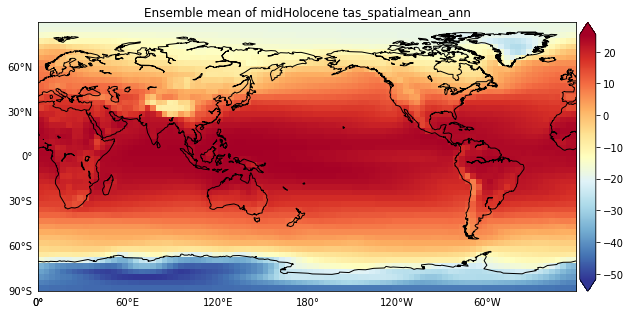

In [39]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.set_title(title)

m=Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution='c',ax=ax)


fig=m.imshow(ensemble_average,cmap=cmap)
#If you want to limit data and colorbar range, please use the below line instead.
#fig=m.imshow(ensemble_average,cmap=cmap,clim=clim,norm=norm)
divider= make_axes_locatable(ax)
cax= divider.append_axes("right", size="3%", pad=0.05)
plt.colorbar(fig, cax=cax,extend='both')

#draw coaselines
m.drawcoastlines()

# draw parallels and meridians.
# label on left and bottom of map.

m.drawparallels(parallels,labels=lat_label,linewidth=0)
m.drawmeridians(meridians,labels=lon_label,linewidth=0)

#plt.savefig('try.png')



### annual mean temperature SD
tas_spatialstddev_ann

In [44]:
variable='tas_spatialstddev_ann'
ensemble_dataset=regrided_dataset()
ensemble_average=np.average(ensemble_dataset,axis=0)

{0.0: ([<matplotlib.lines.Line2D at 0x1351d7748>], [Text(0.36, -93.6, '0°')]),
 60.0: ([<matplotlib.lines.Line2D at 0x1351d7780>],
  [Text(60.12, -93.6, '60°E')]),
 120.0: ([<matplotlib.lines.Line2D at 0x1351e26a0>],
  [Text(120.24, -93.6, '120°E')]),
 180.0: ([<matplotlib.lines.Line2D at 0x1351e29b0>],
  [Text(180.35999999999999, -93.6, '180°')]),
 240.0: ([<matplotlib.lines.Line2D at 0x1351e2cc0>],
  [Text(240.12, -93.6, '120°W')]),
 300.0: ([<matplotlib.lines.Line2D at 0x1351e2fd0>],
  [Text(300.24, -93.6, '60°W')]),
 360.0: ([<matplotlib.lines.Line2D at 0x1351f0320>],
  [Text(0.36, -93.6, '0°')])}

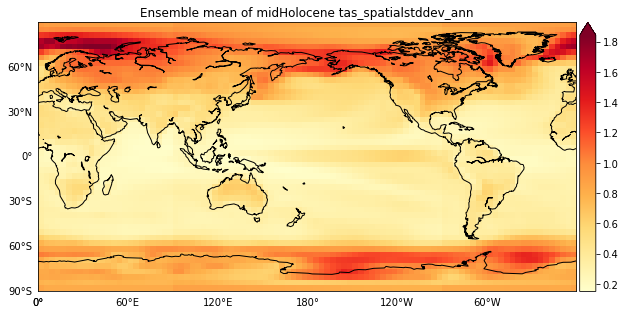

In [45]:
#colormap
cmap=plt.get_cmap('YlOrRd')

#Figure title
title= 'Ensemble mean of %s %s' %(experiment,variable)

plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.set_title(title)

m=Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution='c',ax=ax)


fig=m.imshow(ensemble_average,cmap=cmap)
#If you want to limit data and colorbar range, please use the below line instead.
#fig=m.imshow(ensemble_average,cmap=cmap,clim=clim,norm=norm)
divider= make_axes_locatable(ax)
cax= divider.append_axes("right", size="3%", pad=0.05)
plt.colorbar(fig, cax=cax,extend='max')

#draw coaselines
m.drawcoastlines()

# draw parallels and meridians.
# label on left and bottom of map.

m.drawparallels(parallels,labels=lat_label,linewidth=0)
m.drawmeridians(meridians,labels=lon_label,linewidth=0)



### annual mean precipitation
pr_spatialmean_ann

In [40]:
variable='pr_spatialmean_ann'
ensemble_dataset=regrided_dataset()
ensemble_average=np.average(ensemble_dataset,axis=0)


{0.0: ([<matplotlib.lines.Line2D at 0x134360d68>], [Text(0.36, -93.6, '0°')]),
 60.0: ([<matplotlib.lines.Line2D at 0x134360da0>],
  [Text(60.12, -93.6, '60°E')]),
 120.0: ([<matplotlib.lines.Line2D at 0x13436acc0>],
  [Text(120.24, -93.6, '120°E')]),
 180.0: ([<matplotlib.lines.Line2D at 0x13436afd0>],
  [Text(180.35999999999999, -93.6, '180°')]),
 240.0: ([<matplotlib.lines.Line2D at 0x134373320>],
  [Text(240.12, -93.6, '120°W')]),
 300.0: ([<matplotlib.lines.Line2D at 0x134373630>],
  [Text(300.24, -93.6, '60°W')]),
 360.0: ([<matplotlib.lines.Line2D at 0x134373940>],
  [Text(0.36, -93.6, '0°')])}

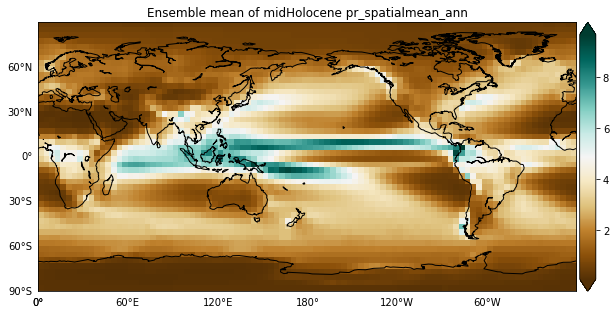

In [41]:
#colormap
cmap=plt.get_cmap('BrBG')

#Figure title
title= 'Ensemble mean of %s %s' %(experiment,variable)

plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.set_title(title)

m=Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution='c',ax=ax)


fig=m.imshow(ensemble_average,cmap=cmap)
#If you want to limit data and colorbar range, please use the below line instead.
#fig=m.imshow(ensemble_average,cmap=cmap,clim=clim,norm=norm)
divider= make_axes_locatable(ax)
cax= divider.append_axes("right", size="3%", pad=0.05)
plt.colorbar(fig, cax=cax,extend='both')

#draw coaselines
m.drawcoastlines()

# draw parallels and meridians.
# label on left and bottom of map.

m.drawparallels(parallels,labels=lat_label,linewidth=0)
m.drawmeridians(meridians,labels=lon_label,linewidth=0)


### annual mean precipitation SD
pr_spatialstddev_ann

In [47]:
variable='pr_spatialstddev_ann'
ensemble_dataset=regrided_dataset()
ensemble_average=np.average(ensemble_dataset,axis=0)

{0.0: ([<matplotlib.lines.Line2D at 0x1369aeef0>], [Text(0.36, -93.6, '0°')]),
 60.0: ([<matplotlib.lines.Line2D at 0x1369aef28>],
  [Text(60.12, -93.6, '60°E')]),
 120.0: ([<matplotlib.lines.Line2D at 0x1369b8e48>],
  [Text(120.24, -93.6, '120°E')]),
 180.0: ([<matplotlib.lines.Line2D at 0x135c02198>],
  [Text(180.35999999999999, -93.6, '180°')]),
 240.0: ([<matplotlib.lines.Line2D at 0x135c024a8>],
  [Text(240.12, -93.6, '120°W')]),
 300.0: ([<matplotlib.lines.Line2D at 0x135c027b8>],
  [Text(300.24, -93.6, '60°W')]),
 360.0: ([<matplotlib.lines.Line2D at 0x135c02ac8>],
  [Text(0.36, -93.6, '0°')])}

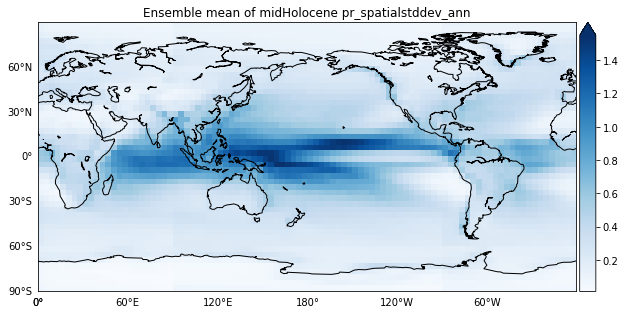

In [48]:
#colormap
cmap=plt.get_cmap('Blues')

#Figure title
title= 'Ensemble mean of %s %s' %(experiment,variable)

plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax.set_title(title)

m=Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution='c',ax=ax)


fig=m.imshow(ensemble_average,cmap=cmap)
#If you want to limit data and colorbar range, please use the below line instead.
#fig=m.imshow(ensemble_average,cmap=cmap,clim=clim,norm=norm)
divider= make_axes_locatable(ax)
cax= divider.append_axes("right", size="3%", pad=0.05)
plt.colorbar(fig, cax=cax,extend='max')

#draw coaselines
m.drawcoastlines()

# draw parallels and meridians.
# label on left and bottom of map.

m.drawparallels(parallels,labels=lat_label,linewidth=0)
m.drawmeridians(meridians,labels=lon_label,linewidth=0)

